In [1]:
import os
import numpy as np
from numpy import array
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

# from mockfactory import Catalog
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles, plotting, Chain
from desilike import setup_logging
setup_logging()  # for logging messages

[Macpomme.local:39095] shmem: mmap: an error occurred while determining whether or not /var/folders/n0/gs1g7p590qg7trf8pp8w29ch0000gn/T//ompi.Macpomme.501/jf.0/1408761856/sm_segment.Macpomme.501.53f80000.0 could be created.


In [2]:
kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

redshift = 1.0
model = 'FOLPS' # Kaiser, TNS, FOLPS

[000002.22] [0/1] 05-28 14:22  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_z1.0.npy.


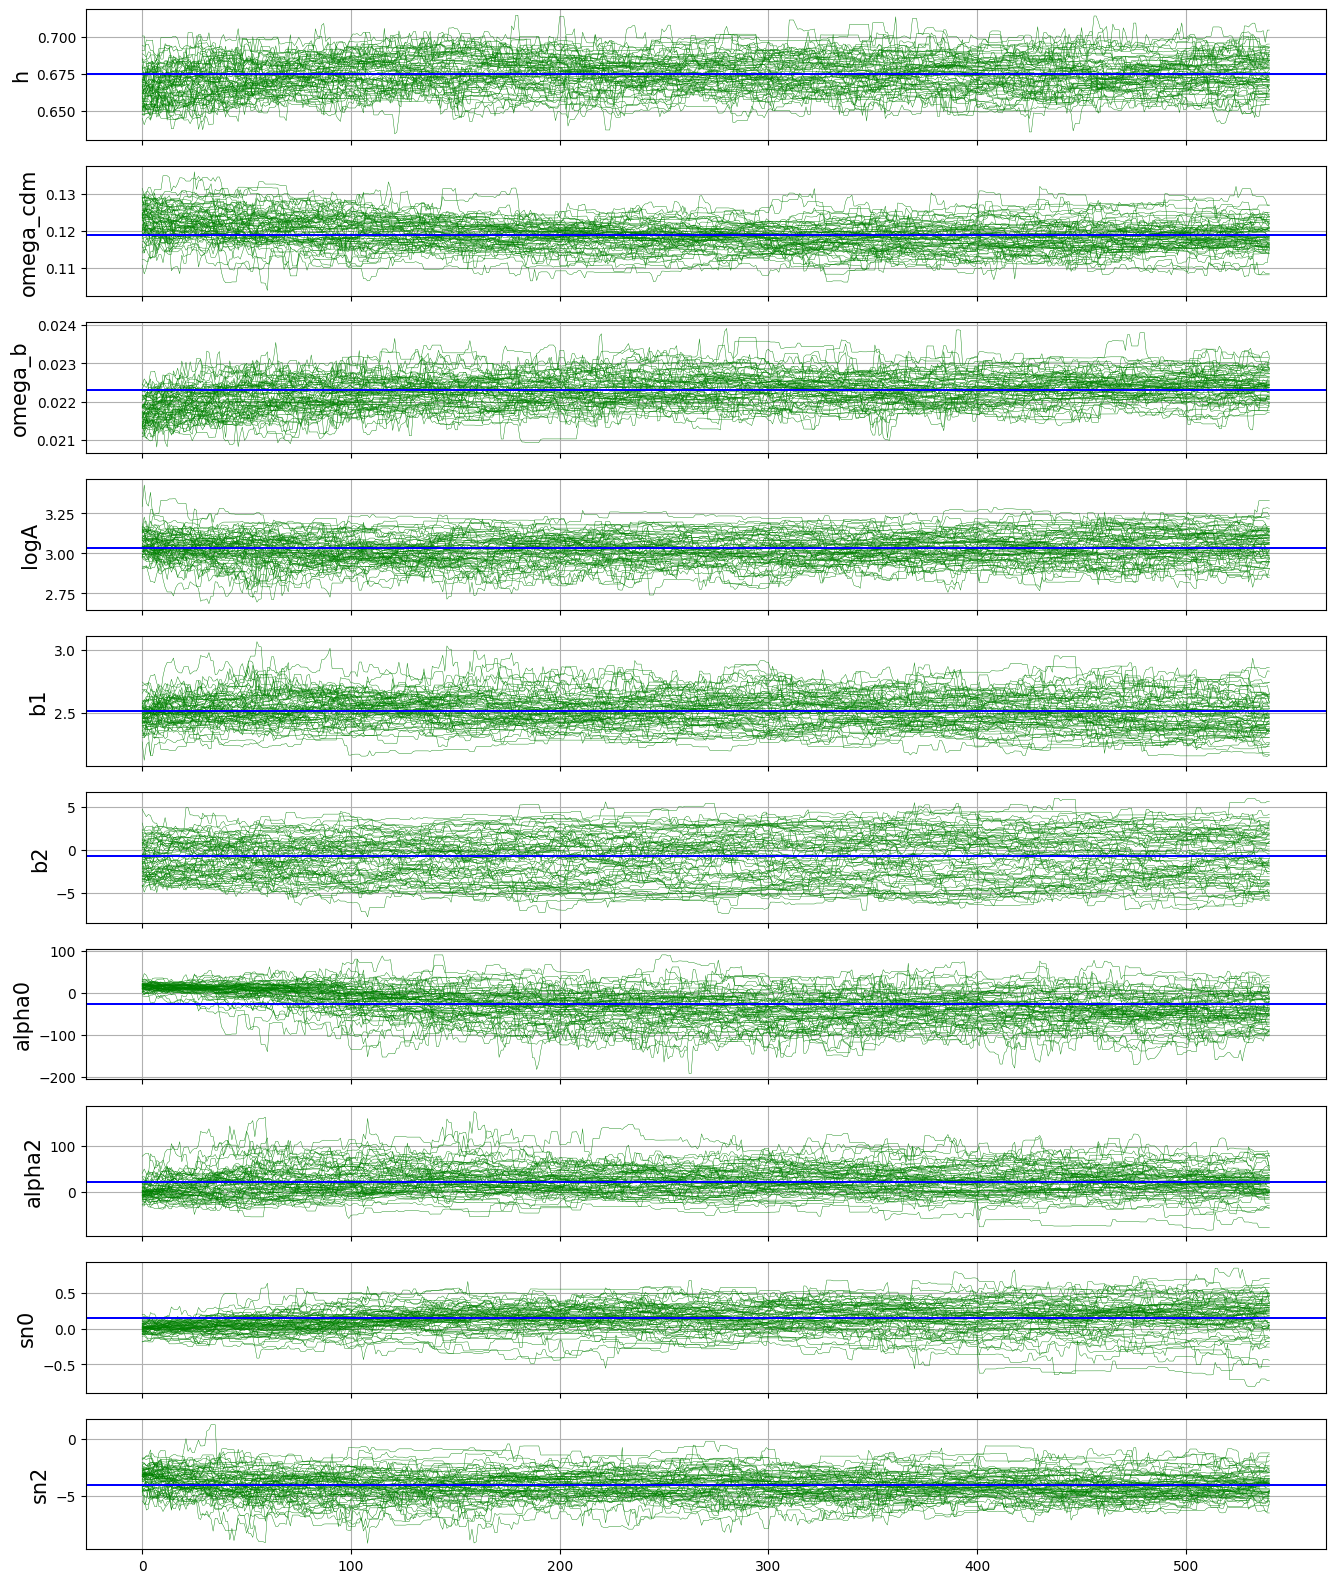

In [3]:
nwalkers        = 64
params          = ['h', 'omega_cdm', 'omega_b', 'logA']+['b1', 'b2', 'alpha0', 'alpha2', 'sn0', 'sn2']
ndim            = len(params)
burnin      = 0.1
slice_step  = 10

chainName   = f'./sampler_result/chain_{model}_z{redshift}.npy'
chain       = Chain.load(chainName).remove_burnin(burnin)[::slice_step]
chain_samples   = dict(zip(chain.basenames(), chain.data))
samples         = np.array([chain_samples[p] for p in params])
medians         = np.array(chain.median(params=params))
fig, ax = plt.subplots(ndim, sharex=True, figsize=(16, 2 * ndim))
for i in range(nwalkers):
    for j in range(ndim):
        ax[j].plot(samples[j, :, i], c = 'green', lw=0.3)
        ax[j].set_ylabel(params[j], fontsize=15)
        ax[j].grid(True)
        ax[j].axhline(medians[j], c='blue', lw=1.2)

[000009.75] [0/1] 05-28 14:22  Emulator                  INFO     Loading ./model/emulator_FOLPS_z1.0.npy.
[000010.50] [0/1] 05-28 14:22  TracerPowerSpectrumMultipolesObservable INFO     Loading 100 files [/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_122_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_101_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_189_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_141_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_180_z1.0.npy].
[000010.65] [0/1] 05-28 14:22  TracerPowerSpectrumMultipolesObservable INFO     Loading 100 files [/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_100_z1.0.npy, ..., /Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_120_z1.0.npy, ..., /Users/alain/Desktop

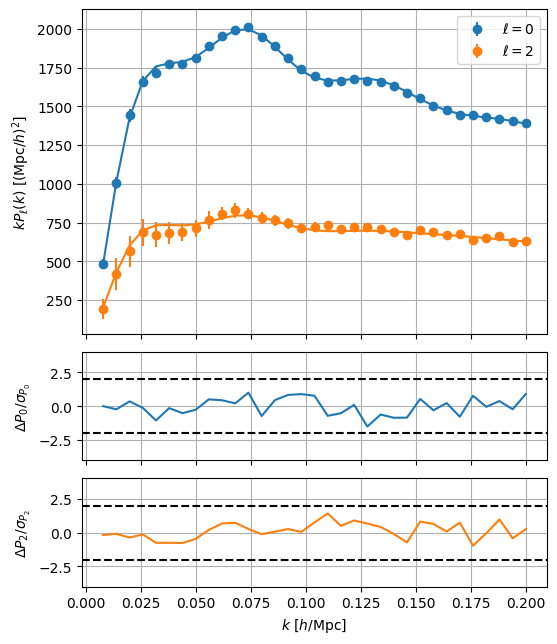

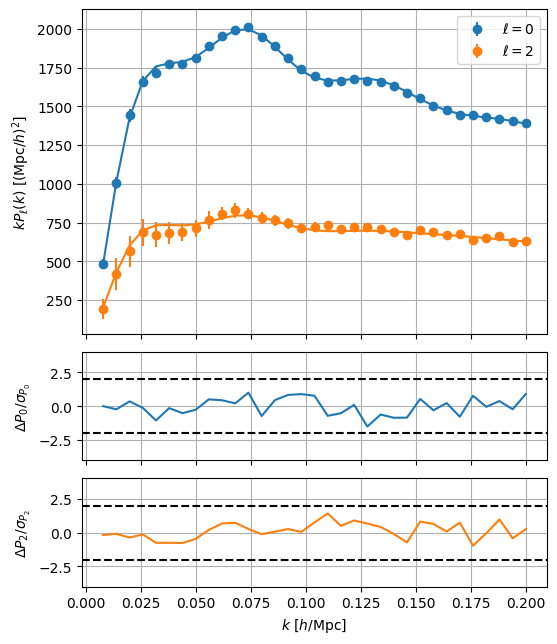

In [4]:
emulator_fn = f'./model/emulator_{model}_z{redshift}.npy'
filename = []
# filedir = '/home/astro/shhe/projectNU/main/data/halos_kbin0.05/fiducial/RSD_z0.5/npy/'
filedir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z{redshift}/npy/'
for file in os.listdir(filedir):
    filename.append(filedir+file)
covariance = filedir+'*'
if model == 'Kaiser':
    theory = KaiserTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
elif model == 'TNS':
    theory = TNSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
elif model == 'FOLPS':
    theory = FOLPSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
observable = TracerPowerSpectrumMultipolesObservable(data= filename,
                                                    covariance= covariance,
                                                    klim=klim,
                                                    theory=theory,
                                                    # kin=np.arange(0.001,0.35,0.002)
                                                    )
likelihood = ObservablesGaussianLikelihood(observable, scale_covariance = 1/25) #
likelihood()
chi2    = -2*likelihood(**chain.choice(index='argmax', input=True))
print(chain.to_stats(tablefmt='pretty'))
print(f'Chisquare: {chi2}')  
likelihood(**chain.choice(index='argmax', input=True))
print('chisquare of bestfit params:',-2*likelihood())
observable.plot()

Removed no burn in
[000016.02] [0/1] 05-28 14:22  root                      WARNING  auto bandwidth for h very small or failed (h=0.000736386745893729,N_eff=34624.0). Using fallback (h=0.018305814468189286)
[000016.03] [0/1] 05-28 14:22  root                      WARNING  auto bandwidth for h very small or failed (h=0.000736386745893729,N_eff=34624.0). Using fallback (h=0.018305814468189286)
[000016.05] [0/1] 05-28 14:22  root                      WARNING  auto bandwidth for omega_cdm very small or failed (h=0.0006983595249043853,N_eff=34624.0). Using fallback (h=0.01584587322327171)
[000016.07] [0/1] 05-28 14:22  root                      WARNING  auto bandwidth for omega_b very small or failed (h=0.0007046139221416605,N_eff=34624.0). Using fallback (h=0.016824515549322457)
[000016.08] [0/1] 05-28 14:22  root                      WARNING  auto bandwidth for logA very small or failed (h=0.0007442528372524283,N_eff=34624.0). Using fallback (h=0.01624434953344557)
[000016.10] [0/1] 05-28

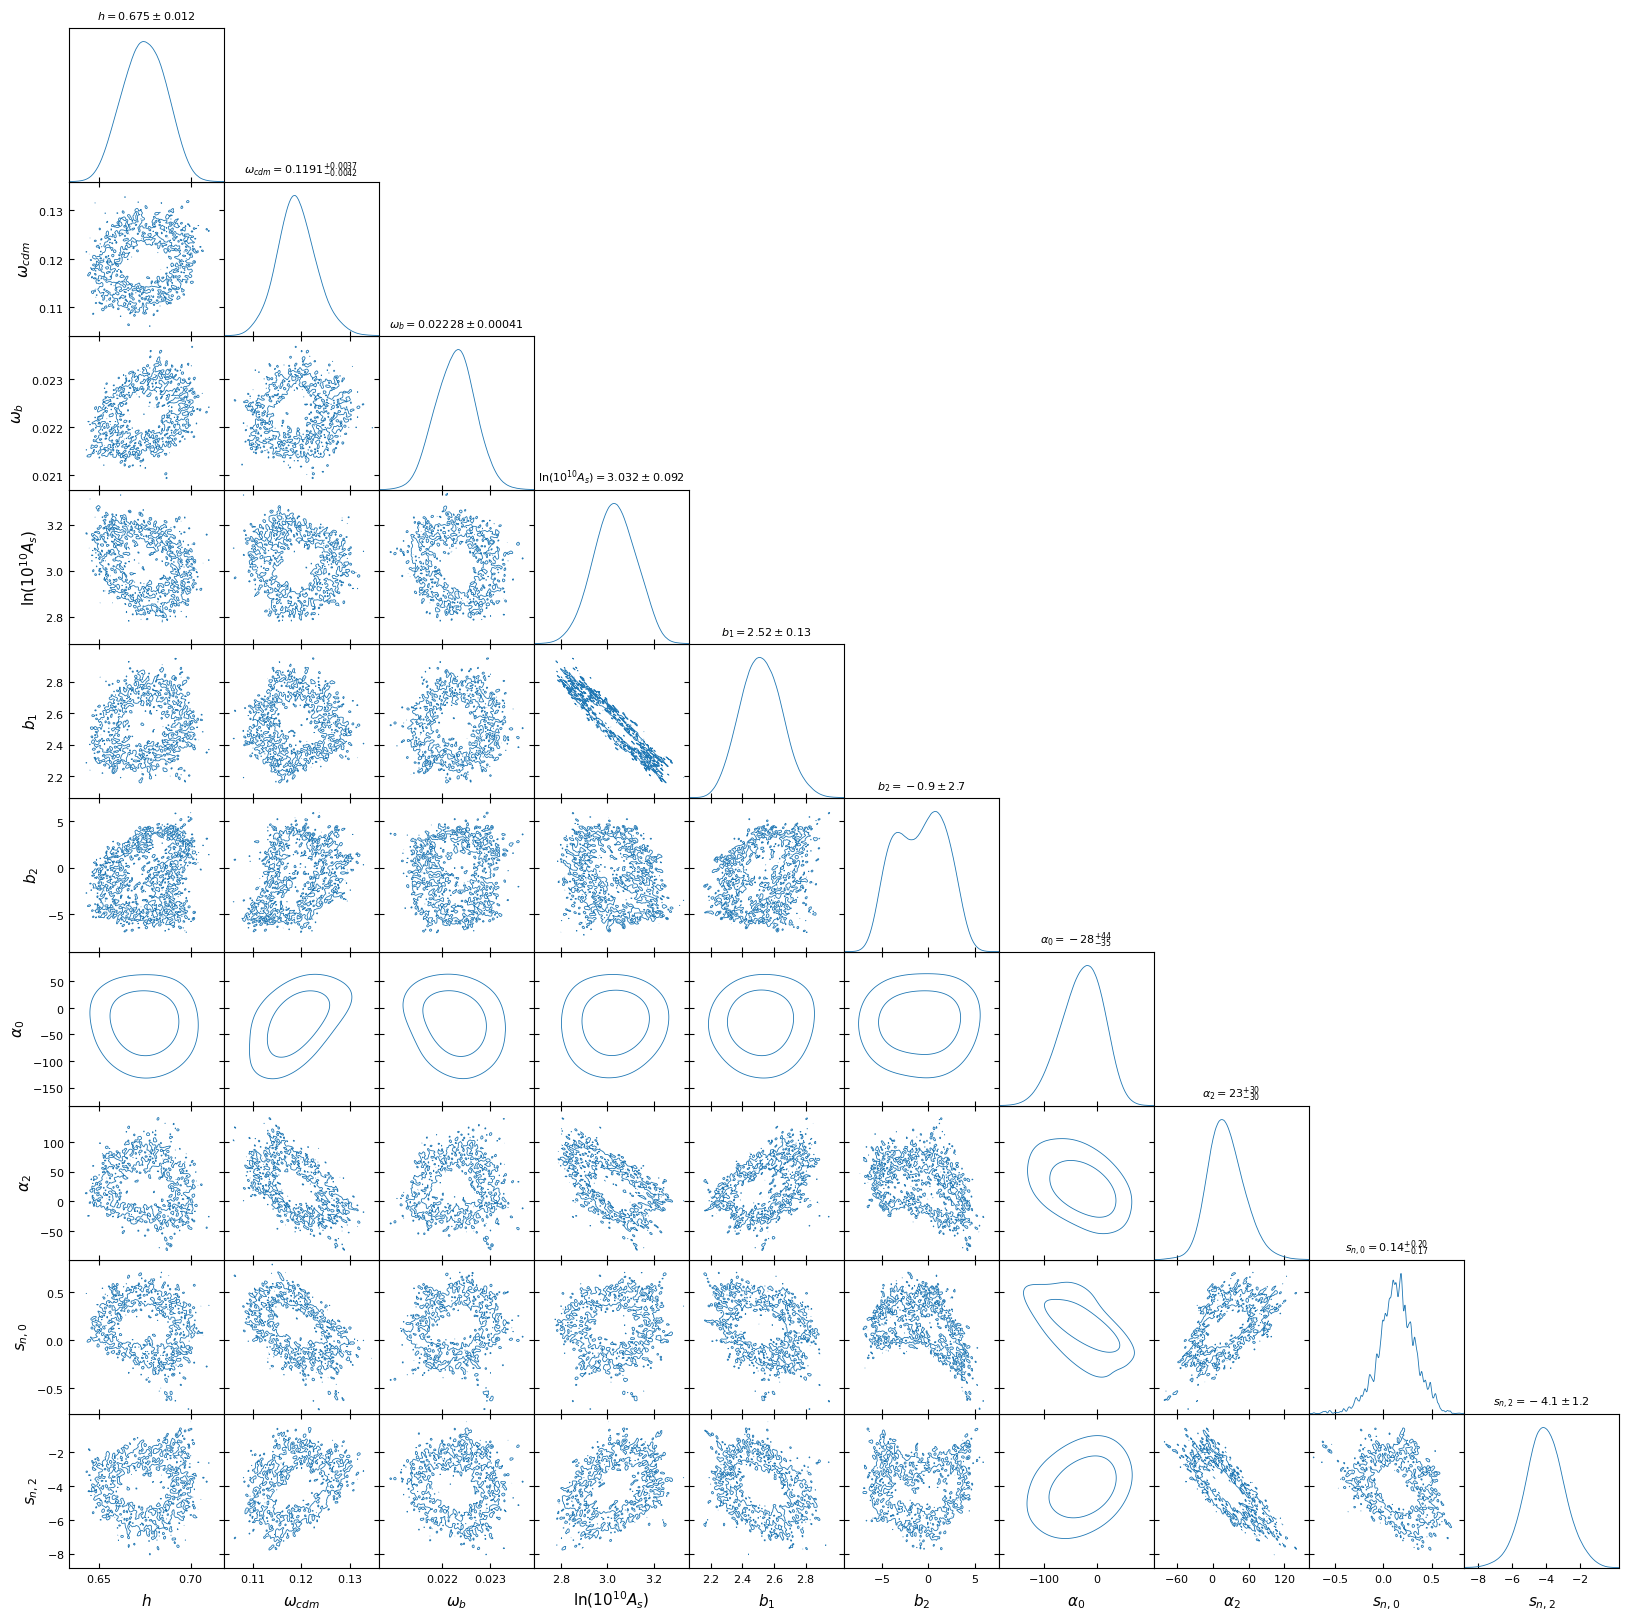

In [5]:
g = plotting.plot_triangle(chain,
                        params = params, 
                        title_limit=1,
                        line_args = [{'color':'C0'}],
                        contour_colors=['C0'],
                        )
g.export()